In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성 (예시 데이터)
data = {
    '날짜': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],
    '요일': [5, 6, 0, 1],
    '평균기온': [10, 15, 12, 8],
    '유동인구': [100, 200, 150, 120],
    '합계': [500, 600, 550, 450]
}
df = pd.DataFrame(data)

# 날짜를 날짜형으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 날짜를 실수형으로 변환
df['날짜'] = df['날짜'].map(pd.Timestamp.to_julian_date)

# 입력 변수와 출력 변수 분리
X = df[['날짜', '요일', '평균기온', '유동인구']]
y = df['합계']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측하기
new_data = {
    '날짜': ['2022-01-05', '2022-01-06'],
    '요일': [2, 3],
    '평균기온': [10, 15],
    '유동인구': [100, 200]
}
new_df = pd.DataFrame(new_data)
new_df['날짜'] = pd.to_datetime(new_df['날짜'])
new_df['날짜'] = new_df['날짜'].map(pd.Timestamp.to_julian_date)
new_X = new_df[['날짜', '요일', '평균기온', '유동인구']]
predictions = model.predict(new_X)

print(predictions)


[469.32437173 569.32437173]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성 (예시 데이터)
data = {
    '날짜': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],
    '요일': [5, 6, 0, 1],
    '평균기온': [10, 15, 12, 8],
    '유동인구': [100, 200, 150, 120],
    '합계': [500, 600, 550, 450]
}
df = pd.DataFrame(data)

# '날짜'를 정수형으로 변환
df['날짜'] = pd.to_datetime(df['날짜']).astype(np.int64) // 10**9

# One-Hot 인코딩을 통해 '요일' 변환
df = pd.get_dummies(df, columns=['요일'])

# 입력 변수와 출력 변수 분리
X = df[['날짜', '평균기온', '유동인구', '요일_0', '요일_1', '요일_5', '요일_6']]
y = df['합계']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측하기
new_data = {
    '날짜': ['2022-01-05', '2022-01-06'],
    '요일': [2, 3],
    '평균기온': [10, 15],
    '유동인구': [100, 200]
}
new_df = pd.DataFrame(new_data)
new_df['날짜'] = pd.to_datetime(new_df['날짜']).astype(np.int64) // 10**9
new_df = pd.get_dummies(new_df, columns=['요일'])
new_X = new_df[['날짜', '평균기온', '유동인구', '요일_2', '요일_3']]
predictions = model.predict(new_X)

# 시각화
plt.plot(df['날짜'], df['합계'], 'o', label='실제 데이터')
plt.plot(new_df['날짜'], predictions, 'o', label='예측 결과')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.legend()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 요일_2
- 요일_3
Feature names seen at fit time, yet now missing:
- 요일_0
- 요일_1
- 요일_5
- 요일_6


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성 (예시 데이터)
data = {
    '날짜': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],
    '요일': [5, 6, 0, 1],
    '평균기온': [10, 15, 12, 8],
    '유동인구': [100, 200, 150, 120],
    '합계': [500, 600, 550, 450]
}
df = pd.DataFrame(data)

# '날짜'를 정수형으로 변환
df['날짜'] = pd.to_datetime(df['날짜']).astype(np.int64) // 10**9

# One-Hot 인코딩을 통해 '요일' 변환
df = pd.get_dummies(df, columns=['요일'])

# 입력 변수와 출력 변수 분리
X = df[['날짜', '평균기온', '유동인구', '요일_0', '요일_1', '요일_5', '요일_6']]
y = df['합계']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측하기
new_data = {
    '날짜': ['2022-01-05', '2022-01-06'],
    '요일': [2, 3],
    '평균기온': [10, 15],
    '유동인구': [100, 200]
}
new_df = pd.DataFrame(new_data)
new_df['날짜'] = pd.to_datetime(new_df['날짜']).astype(np.int64) // 10**9
new_df = pd.get_dummies(new_df, columns=['요일'])

# 누락된 특성 추가
new_df['요일_0'] = 0
new_df['요일_1'] = 0
new_df['요일_5'] = 0
new_df['요일_6'] = 0

# 예측
predictions = model.predict(new_df[['날짜', '평균기온', '유동인구', '요일_0', '요일_1', '요일_2', '요일_3', '요일_5', '요일_6']])

# 시각화
plt.plot(df['날짜'], df['합계'], 'o', label='실제 데이터')
plt.plot(new_df['날짜'], predictions, 'o', label='예측 결과')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.legend()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 요일_2
- 요일_3


In [9]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


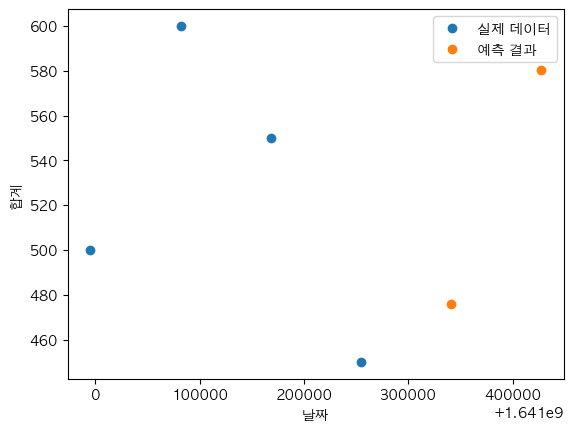

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성 (예시 데이터)
data = {
    '날짜': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],
    '요일': [5, 6, 0, 1],
    '평균기온': [10, 15, 12, 8],
    '유동인구': [100, 200, 150, 120],
    '합계': [500, 600, 550, 450]
}
df = pd.DataFrame(data)

# '날짜'를 정수형으로 변환
df['날짜'] = pd.to_datetime(df['날짜']).astype(np.int64) // 10**9

# One-Hot 인코딩을 통해 '요일' 변환
df = pd.get_dummies(df, columns=['요일'])

# 입력 변수와 출력 변수 분리
X = df[['날짜', '평균기온', '유동인구', '요일_0', '요일_1', '요일_5', '요일_6']]
y = df['합계']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측하기
new_data = {
    '날짜': ['2022-01-05', '2022-01-06'],
    '요일': [2, 3],
    '평균기온': [10, 15],
    '유동인구': [100, 200]
}
new_df = pd.DataFrame(new_data)
new_df['날짜'] = pd.to_datetime(new_df['날짜']).astype(np.int64) // 10**9

# One-Hot 인코딩을 통해 '요일' 변환
new_df = pd.get_dummies(new_df, columns=['요일'])

# 누락된 특성 추가
new_df['요일_0'] = 0
new_df['요일_1'] = 0
new_df['요일_5'] = 0
new_df['요일_6'] = 0

# 예측
predictions = model.predict(new_df[['날짜', '평균기온', '유동인구', '요일_0', '요일_1', '요일_5', '요일_6']])

# 시각화
plt.plot(df['날짜'], df['합계'], 'o', label='실제 데이터')
plt.plot(new_df['날짜'], predictions, 'o', label='예측 결과')
plt.xlabel('날짜')
plt.ylabel('합계')
plt.legend()
plt.show()
